# Конструирование признаков (Feature Engineering)

---

**Источники:**

[Искусство Feature Engineering в машинном обучении](https://habr.com/ru/company/mlclass/blog/248129/)

[Конструирование признаков](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2)

[Representation: Feature Engineering](https://developers.google.com/machine-learning/crash-course/representation/feature-engineering)

[7 Feature Engineering Techniques in Machine Learning You Should Know](https://www.analyticsvidhya.com/blog/2020/10/7-feature-engineering-techniques-machine-learning/)

[Feature Engineering — deep dive into Encoding and Binning techniques](https://towardsdatascience.com/feature-engineering-deep-dive-into-encoding-and-binning-techniques-5618d55a6b38)

[Feature Engineering in Machine Learning](https://lucasxlu.github.io/blog/2018/08/20/ml-feml/)

[Binning Data with Pandas qcut and cut](https://pbpython.com/pandas-qcut-cut.html)

[Data Preprocessing with Python Pandas — Part 5 Binning](https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950)

[Category Encoders](https://contrib.scikit-learn.org/category_encoders/)

[Feature Engineering Examples: Binning Categorical Features](https://towardsdatascience.com/feature-engineering-examples-binning-categorical-features-9f8d582455da)

[The Curse of Dimensionality… minus the curse of jargon](https://towardsdatascience.com/the-curse-of-dimensionality-minus-the-curse-of-jargon-520da109fc87)

[Simple Methods to deal with Categorical Variables in Predictive Modeling](https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/)

[Difference between OrdinalEncoder and LabelEncoder](https://datascience.stackexchange.com/questions/39317/difference-between-ordinalencoder-and-labelencoder)

[Семплирование](https://ru.wikipedia.org/wiki/%D0%A1%D0%B5%D0%BC%D0%BF%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_(%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0))

[The Bag of Words representation](https://scikit-learn.org/stable/modules/feature_extraction.html#the-bag-of-words-representation)

[10+ Examples for Using CountVectorizer](https://kavita-ganesan.com/how-to-use-countvectorizer/#.YH7OmHUzaV4)

---

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
!conda install matplotlib numpy scikit-learn seaborn scipy category_encoders -y

Solving environment: done

# All requested packages already installed.



In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import seaborn as sns

sns.__version__

'0.11.1'

In [6]:
import scipy

scipy.__version__

'1.6.2'

In [7]:
import category_encoders

category_encoders.__version__

'2.2.2'

## Создание `DataFrame` для примера

In [8]:
# товары в интернет магазине
df = pd.DataFrame({'user_name': pd.Series(['Mr Oleg', 'Mr Oleg',
                                           'Mr Pete', 'Mr Pete', 
                                           'Mrs Elena', 'Mr Viktor',
                                           'Mr Anton', 'Mr Anton', 
                                           'Mrs Alex', 'Mrs Alex'], 
                                          dtype='string'),
                   
                   'user_country': pd.Series(['Russia', 'Russia', 
                                              'USA', 'USA', 
                                              'India', 'Germany', 
                                              'Russia', 'Russia', 
                                              'Germany', 'Germany'], 
                                             dtype='category'), 
                   
                   'user_age': pd.Series([25, 25,
                                          66, 66, 
                                          36, 15,
                                          48, 48, 
                                          86, 86], 
                                         dtype='int8'),
                   
                  'user_rating': pd.Series(['5 star', '5 star', 
                                            '3 star', '3 star', 
                                            '1 star', '2 star', 
                                            '5 star', '5 star', 
                                            '4 star', '4 star'], 
                                           dtype=pd.CategoricalDtype(categories=['1 star', 
                                                                                 '2 star', 
                                                                                 '3 star', 
                                                                                 '4 star', 
                                                                                 '5 star'], ordered=True)),
                   
                'user_complaints': pd.Series(['1 point', '1 point', 
                                            '4 point', '4 point', 
                                            '5 point', '5 point', 
                                            '1 point', '1 point', 
                                            '2 point', '2 point'], 
                                           dtype=pd.CategoricalDtype(categories=['5 point',
                                                                                 '4 point', 
                                                                                 '3 point', 
                                                                                 '2 point', 
                                                                                 '1 point'], ordered=True)),
                   
                  'item_title': pd.Series(['toy', 'Beautiful Cat', 
                                           'Car', 'TV', 
                                           'Toys', 'Television', 
                                           'Smartphone', 'Dog', 
                                           'Kitty', 'Soft TOY'], 
                                          dtype='string'),
                   
                   'item_price_rub': pd.Series([300.50, 5000, 
                                                800_500, 19_999.99, 
                                                678.23, 10_999.99, 
                                                10_000, 1_000, 
                                                100, 4999.99], 
                                               dtype='float'),  

                  'item_width_cm': pd.Series([20, 80, 
                                              300, 200, 
                                              100, 150, 
                                              10, 100, 
                                              15, 150], 
                                             dtype='int16'),  
                   
                   'item_height_cm': pd.Series([30, 50, 
                                                200, 100, 
                                                80, 80, 
                                                15, 90, 
                                                10, 150], 
                                               dtype='int16'),
                   
                   'item_description': pd.Series(['Little kids love things bright and colorful. They are easily attracted to them. Colorful Learning Blocks set to make your little one playtime educational yet fun. ', 
                                                  'Kids and adults love cats! This animal is stunning. It likes play with all people in living room or bedroom!', 
                                                  'Comfortable seats. Updated interior displays. Beautifully finished interior.', 
                                                  'Operating System: Android (Google Assistant & Chromecast in-built). You can enjoy a stunning viewing experience in your living room or bedroom.', 
                                                  'Blocks for the creative minds. Perfect for the growing kids. Contains alphabet blocks, 4 animal puzzles and a set of blocks. ', 
                                                  'Operating System: Android (Google Assistant & Chromecast in-built). The Gamma Engine, along with the noise reduction feature, delivers lifelike visuals with dynamic contrast and anti-aliasing to enhance your viewing experience.', 
                                                  'If you like Android, the Samsung Galaxy S21 Ultra is incredibly good.', 
                                                  'This dog is a perfect choice! The dog for free adoption. Perfect for the adults.',
                                                  'Kittens for free adoption. Perfect for the adults. If you like cats, a kitten is an incredibly good choice.',
                                                  'Kids and adults love soft toys! It can beautify interior and perfect for the growing kids.'], 
                                                 dtype='string'),
                  
                   'item_tags': pd.Series(['children, beautiful, good_condition', 
                                           'animal, cat, beautiful', 
                                           'beautiful, good_condition', 
                                           'good_condition', 
                                           'children, animal', 
                                           'good_condition', 
                                           'good_condition', 
                                           'animal, dog', 'animal',
                                           'children, good_condition'], 
                                          dtype='string'),
                                     
                   'item_age_month': pd.Series([1, 0, 
                                                6, 12, 
                                                3, 4, 
                                                18, 1, 
                                                9, 8], 
                                              dtype='int16'),
                   
                   'item_color': pd.Series(['red', 'blue', 
                                            'rainbow', 'white', 
                                            'red', 'white', 
                                            'rainbow', 'white', 
                                            'white', 'blue'], 
                                           dtype='category'),
                   
                    'open_date_time': pd.Series(['10.10.2020 18:25', '20.12.2020 16:36', 
                                                 '06.04.2021 10:14', '07.04.2021 23:25', 
                                                 '25.11.2020 06:17', '16.12.2020 15:15', 
                                                 '10.03.2021 09:08', '31.12.2020 04:57', 
                                                 '28.12.2020 12:54', '29.12.2020 23:25'], 
                                                dtype='datetime64[ns]'),
                   
                   'status': pd.Series(['sold out', 'for_sale', 
                                        'for_sale', 'for_sale', 
                                        'sold out', 'sold out', 
                                        'for_sale', 'for_sale', 
                                        'sold out', 'for_sale'], 
                                       dtype='string')
                  })

In [9]:
# отображать все колонки
pd.options.display.max_columns = None

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_name         10 non-null     string        
 1   user_country      10 non-null     category      
 2   user_age          10 non-null     int8          
 3   user_rating       10 non-null     category      
 4   user_complaints   10 non-null     category      
 5   item_title        10 non-null     string        
 6   item_price_rub    10 non-null     float64       
 7   item_width_cm     10 non-null     int16         
 8   item_height_cm    10 non-null     int16         
 9   item_description  10 non-null     string        
 10  item_tags         10 non-null     string        
 11  item_age_month    10 non-null     int16         
 12  item_color        10 non-null     category      
 13  open_date_time    10 non-null     datetime64[ns]
 14  status            10 non-null

In [11]:
df

,user_name,user_country,user_age,user_rating,user_complaints,item_title,item_price_rub,item_width_cm,item_height_cm,item_description,item_tags,item_age_month,item_color,open_date_time,status
0,Mr Oleg,Russia,25,5 star,1 point,toy,300.50,20,30,Little kids love things bright and colorful. T...,"children, beautiful, good_condition",1,red,2020-10-10 18:25:00,sold out
1,Mr Oleg,Russia,25,5 star,1 point,Beautiful Cat,5000.00,80,50,Kids and adults love cats! This animal is stun...,"animal, cat, beautiful",0,blue,2020-12-20 16:36:00,for_sale
2,Mr Pete,USA,66,3 star,4 point,Car,800500.00,300,200,Comfortable seats. Updated interior displays. ...,"beautiful, good_condition",6,rainbow,2021-06-04 10:14:00,for_sale
3,Mr Pete,USA,66,3 star,4 point,TV,19999.99,200,100,Operating System: Android (Google Assistant & ...,good_condition,12,white,2021-07-04 23:25:00,for_sale
4,Mrs Elena,India,36,1 star,5 point,Toys,678.23,100,80,Blocks for the creative minds. Perfect for the...,"children, animal",3,red,2020-11-25 06:17:00,sold out
5,Mr Viktor,Germany,15,2 star,5 point,Television,10999.99,150,80,Operating System: Android (Google Assistant & ...,good_condition,4,white,2020-12-16 15:15:00,sold out
6,Mr Anton,Russia,48,5 star,1 point,Smartphone,10000.00,10,15,"If you like Android, the Samsung Galaxy S21 Ul...",good_condition,18,rainbow,2021-10-03 09:08:00,for_sale
7,Mr Anton,Russia,48,5 star,1 point,Dog,1000.00,100,90,This dog is a perfect choice! The dog for free...,"animal, dog",1,white,2020-12-31 04:57:00,for_sale
8,Mrs Alex,Germany,86,4 star,2 point,Kitty,100.00,15,10,Kittens for free adoption. Perfect for the adu...,animal,9,white,2020-12-28 12:54:00,sold out
9,Mrs Alex,Germany,86,4 star,2 point,Soft TOY,4999.99,150,150,Kids and adults love soft toys! It can beautif...,"children, good_condition",8,blue,2020-12-29 23:25:00,for_sale


### Анализ типов шкал

(см. [лекцию](../../03_data_analysis/lectures/08_statistical_data_types.ipynb))

- `user_name` - номинальная
- `user_country` - номинальная
- `user_age` - отношений
- `user_rating` - порядковая 
- `item_title` - номинальная
- `item_price_rub` - отношений
- `item_width_cm` - отношений
- `item_height_cm` - отношений
- `item_description` - номинальная
- `item_tags` - номинальная
- `item_age_month` - отношений
- `item_color` - номинальная
- `open_date_time` - интервальная
- `status` - номинальная или порядковая

In [12]:
# проверим правильно ли задан тип порядковой категории
df.item_age_month

0     1
1     0
2     6
3    12
4     3
5     4
6    18
7     1
8     9
9     8
Name: item_age_month, dtype: int16

In [13]:
# в ячейках open_date_time содержаться данные типа Timestamp
df.open_date_time[0]

Timestamp('2020-10-10 18:25:00')

[Документация по pandas.Timestamp](https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html).

In [14]:
# у Timestamp можно получить номер дня в дате
df.open_date_time[0].day

10

In [15]:
# у Timestamp можно получить день года
df.open_date_time[0].day_of_year

284

## Конструирование признаков (Feature Engineering)

<blockquote>Придумывать признаки трудно, требует много времени и глубоких знаний. «Прикладное машинное обучение», в основном, это конструирование признаков.
— Эндрю Ын </blockquote>

**Признак** — это качество или свойство, присущее всем независимым объектам, анализ или прогноз для которых производится. Любое качество может быть полезным, если оно полезно для модели.

Смысл **признака** и чем он отличается от качества, легче было бы понять в контексте задачи. **Признак является характеристикой, которая может помочь решить задачу**.

**Признаки** в данных важны для используемых прогнозных моделей и влияют на результат, который необходимо получить. **Качество и количество признаков оказывают большое влияние на качество модели, будет она хорошей или нет.**

Можно сказать, что чем лучше **признаки**, тем лучше будет результат. Это не совсем полная правда, поскольку результат будет зависеть от модели и данных, не просто от выбранных **признаков**. Но отбор правильных **признаков** остаётся очень важным делом. Более качественные **признаки** могут дать более простую и более гибкую модель и часто они дают лучшие результаты.

**Конструирование признаков** — это процесс использования предметной области данных для создания признаков, которые нужны для машинного обучения. 

**Конструирование признаков** является фундаментом для приложений машинного обучения, а также трудным и затратным процессом. Необходимости ручного конструирования признаков можно избежать при автоматизации прикладного обучения признакам.

Почти любая задача начинается с создания (Engineering) и отбора (Selection) признаков.

**Процесс конструирования признаков** — это
- Метод мозгового штурма или проверка признаков;
- Решение, какие признаки создавать;
- Создание признаков;
- Проверка, какие признаки работают с моделью;
- Улучшение признаков, если требуется;
- Возврат к методу мозгового штурма/создание других признаков, пока работа не будет завершена.


Большинство алгоритмов (или библиотек машинного обучения) дают лучший результат с числовыми признаками.

В Python для библиотеки `sklearn` требуются признаки в числовых массивах (`np.array`, `pd.DataFrame`, `pd.Series`).

## Строковые признаки

**Возможное решение:**
- В самих строках зачастую содержится информация ("Mr.", "Mrs." преобразовать в половой признак).
- Сократить количество "категорий" ("кот", "кошка", "кошечка", "котенок" -> "кот").
- Разделить строку на несколько признаков (список тегов, ФИО), если их не очень много.
- Преобразовать к другому типу ("первое января 93-го года" преобразовать в 01.01.1993).
- [Мешок слов (bag-of-words)](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%88%D0%BE%D0%BA_%D1%81%D0%BB%D0%BE%D0%B2) — упрощенное представление текста, которое используется в обработке естественных языков и информационном поиске. В этой модели текст (одно предложение или весь документ) представляется в виде мешка (мультимножества) его слов без какого-либо учета грамматики и порядка слов, но с сохранением информации об их количестве.
- ...

In [16]:
df.select_dtypes(include='string')

,user_name,item_title,item_description,item_tags,status
0,Mr Oleg,toy,Little kids love things bright and colorful. T...,"children, beautiful, good_condition",sold out
1,Mr Oleg,Beautiful Cat,Kids and adults love cats! This animal is stun...,"animal, cat, beautiful",for_sale
2,Mr Pete,Car,Comfortable seats. Updated interior displays. ...,"beautiful, good_condition",for_sale
3,Mr Pete,TV,Operating System: Android (Google Assistant & ...,good_condition,for_sale
4,Mrs Elena,Toys,Blocks for the creative minds. Perfect for the...,"children, animal",sold out
5,Mr Viktor,Television,Operating System: Android (Google Assistant & ...,good_condition,sold out
6,Mr Anton,Smartphone,"If you like Android, the Samsung Galaxy S21 Ul...",good_condition,for_sale
7,Mr Anton,Dog,This dog is a perfect choice! The dog for free...,"animal, dog",for_sale
8,Mrs Alex,Kitty,Kittens for free adoption. Perfect for the adu...,animal,sold out
9,Mrs Alex,Soft TOY,Kids and adults love soft toys! It can beautif...,"children, good_condition",for_sale


### Получить информацию из строки (на примере `pandas.Series.str.contains`)

ВНИМАНИЕ: Требуется понимание предметной области!

In [17]:
# предположим, что может быть только Mr или Mrs, тогда можно
# создать колонку (bool) определяющую пол пользователя
df['user_sex'] = df.user_name.str.contains("Mrs")

# False = Мужчина / True = Женщина
df.user_sex

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8     True
9     True
Name: user_sex, dtype: boolean

### Группировка строковых признаков и формирование "групп" (Binning/Discretization) с помощью `replace` (`pandas`)

ВНИМАНИЕ: Требуется понимание предметной области!

*Может потребовать задействовать другие модели для получения похожих данных для группировки.

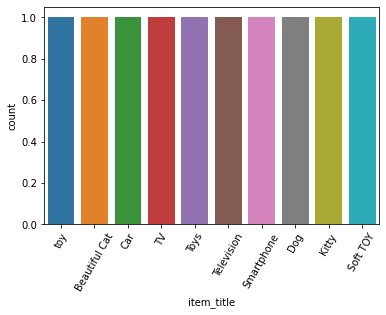

In [18]:
# какие наименования имеются?
g = sns.countplot(x=df.item_title)
_ = g.set_xticklabels(g.get_xticklabels(), rotation=60)

In [19]:
# сформировать, что заменяем и на что
toy_replacement = dict.fromkeys(['toy', 'Toys', 'Soft TOY'], 'Toy')
toy_replacement

{'toy': 'Toy', 'Toys': 'Toy', 'Soft TOY': 'Toy'}

In [20]:
# сформировать, что заменяем и на что
cat_replacement = dict.fromkeys(['Beautiful Cat', 'Kitty'], 'Cat')
cat_replacement

{'Beautiful Cat': 'Cat', 'Kitty': 'Cat'}

In [21]:
# создать новую колонку с замененными значениями
df['item_title_grouped'] = df.item_title.replace(to_replace=toy_replacement).replace(to_replace=cat_replacement).replace(to_replace='Television', value='TV')

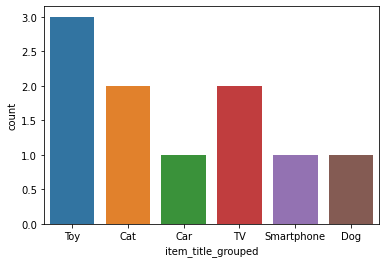

In [22]:
_ = sns.countplot(x=df.item_title_grouped)

### Разделить строку на несколько признаков с помощью `apply` (`pandas`)

ВНИМАНИЕ: Требуется понимание предметной области!

In [23]:
df.item_tags

0    children, beautiful, good_condition
1                 animal, cat, beautiful
2              beautiful, good_condition
3                         good_condition
4                       children, animal
5                         good_condition
6                         good_condition
7                            animal, dog
8                                 animal
9               children, good_condition
Name: item_tags, dtype: string

In [24]:
# в параметр index попадает список тегов (разделенных), к ним добавляется префикс tag_
# метод apply применяется для каждой строки и возвращает DataFrame
item_tags_df = df.item_tags.apply(lambda x: pd.Series(True, index=[f'tag_{tag}' for tag in x.split(", ")]))
item_tags_df

,tag_children,tag_beautiful,tag_good_condition,tag_animal,tag_cat,tag_dog
0,True,True,True,NaN,NaN,NaN
1,NaN,True,NaN,True,True,NaN
2,NaN,True,True,NaN,NaN,NaN
3,NaN,NaN,True,NaN,NaN,NaN
4,True,NaN,NaN,True,NaN,NaN
5,NaN,NaN,True,NaN,NaN,NaN
6,NaN,NaN,True,NaN,NaN,NaN
7,NaN,NaN,NaN,True,NaN,True
8,NaN,NaN,NaN,True,NaN,NaN
9,True,NaN,True,NaN,NaN,NaN


In [25]:
# все незаполненные значения (NA) заменяются на False
item_tags_df = item_tags_df.fillna(False)
item_tags_df

,tag_children,tag_beautiful,tag_good_condition,tag_animal,tag_cat,tag_dog
0,True,True,True,False,False,False
1,False,True,False,True,True,False
2,False,True,True,False,False,False
3,False,False,True,False,False,False
4,True,False,False,True,False,False
5,False,False,True,False,False,False
6,False,False,True,False,False,False
7,False,False,False,True,False,True
8,False,False,False,True,False,False
9,True,False,True,False,False,False


In [26]:
# присоединить колонки с тегами к df
df = df.join(item_tags_df)

### Преобразовать к другому типу с помощью `map` (`pandas`)

ВНИМАНИЕ: Требуется понимание предметной области!

In [27]:
df.status

0    sold out
1    for_sale
2    for_sale
3    for_sale
4    sold out
5    sold out
6    for_sale
7    for_sale
8    sold out
9    for_sale
Name: status, dtype: string

In [28]:
df['is_sold_out'] = df.status.map({'sold out': True, 'for_sale': False})
df

,user_name,user_country,user_age,user_rating,user_complaints,item_title,item_price_rub,item_width_cm,item_height_cm,item_description,item_tags,item_age_month,item_color,open_date_time,status,user_sex,item_title_grouped,tag_children,tag_beautiful,tag_good_condition,tag_animal,tag_cat,tag_dog,is_sold_out
0,Mr Oleg,Russia,25,5 star,1 point,toy,300.50,20,30,Little kids love things bright and colorful. T...,"children, beautiful, good_condition",1,red,2020-10-10 18:25:00,sold out,False,Toy,True,True,True,False,False,False,True
1,Mr Oleg,Russia,25,5 star,1 point,Beautiful Cat,5000.00,80,50,Kids and adults love cats! This animal is stun...,"animal, cat, beautiful",0,blue,2020-12-20 16:36:00,for_sale,False,Cat,False,True,False,True,True,False,False
2,Mr Pete,USA,66,3 star,4 point,Car,800500.00,300,200,Comfortable seats. Updated interior displays. ...,"beautiful, good_condition",6,rainbow,2021-06-04 10:14:00,for_sale,False,Car,False,True,True,False,False,False,False
3,Mr Pete,USA,66,3 star,4 point,TV,19999.99,200,100,Operating System: Android (Google Assistant & ...,good_condition,12,white,2021-07-04 23:25:00,for_sale,False,TV,False,False,True,False,False,False,False
4,Mrs Elena,India,36,1 star,5 point,Toys,678.23,100,80,Blocks for the creative minds. Perfect for the...,"children, animal",3,red,2020-11-25 06:17:00,sold out,True,Toy,True,False,False,True,False,False,True
5,Mr Viktor,Germany,15,2 star,5 point,Television,10999.99,150,80,Operating System: Android (Google Assistant & ...,good_condition,4,white,2020-12-16 15:15:00,sold out,False,TV,False,False,True,False,False,False,True
6,Mr Anton,Russia,48,5 star,1 point,Smartphone,10000.00,10,15,"If you like Android, the Samsung Galaxy S21 Ul...",good_condition,18,rainbow,2021-10-03 09:08:00,for_sale,False,Smartphone,False,False,True,False,False,False,False
7,Mr Anton,Russia,48,5 star,1 point,Dog,1000.00,100,90,This dog is a perfect choice! The dog for free...,"animal, dog",1,white,2020-12-31 04:57:00,for_sale,False,Dog,False,False,False,True,False,True,False
8,Mrs Alex,Germany,86,4 star,2 point,Kitty,100.00,15,10,Kittens for free adoption. Perfect for the adu...,animal,9,white,2020-12-28 12:54:00,sold out,True,Cat,False,False,False,True,False,False,True
9,Mrs Alex,Germany,86,4 star,2 point,Soft TOY,4999.99,150,150,Kids and adults love soft toys! It can beautif...,"children, good_condition",8,blue,2020-12-29 23:25:00,for_sale,True,Toy,True,False,True,False,False,False,False


### *Мешок слов (bag-of-words) на примере `CountVectorizer` (`sklearn`)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

# можно определить различные параметры
# lowercase - преобразовать все слова к нижнему регистру
cv = CountVectorizer(lowercase=True, stop_words='english')
cv

CountVectorizer(stop_words='english')

In [30]:
# подготовить кодировщик
# произвести преобразования
item_description_cv = cv.fit_transform(df.item_description)

# ВНИМАНИЕ: scipy.sparse.csr.csr_matrix - это не то, что можно сразу же добавить к DataFrame
print(type(item_description_cv))
item_description_cv

<class 'scipy.sparse.csr.csr_matrix'>


<10x77 sparse matrix of type '<class 'numpy.int64'>'
	with 113 stored elements in Compressed Sparse Row format>

In [31]:
# получить имена новых колонок из кодировщика
item_description_column_names = cv.get_feature_names()
item_description_column_names

['adoption',
 'adults',
 'aliasing',
 'alphabet',
 'android',
 'animal',
 'anti',
 'assistant',
 'attracted',
 'beautifully',
 'beautify',
 'bedroom',
 'blocks',
 'bright',
 'built',
 'cats',
 'choice',
 'chromecast',
 'colorful',
 'comfortable',
 'contains',
 'contrast',
 'creative',
 'delivers',
 'displays',
 'dog',
 'dynamic',
 'easily',
 'educational',
 'engine',
 'enhance',
 'enjoy',
 'experience',
 'feature',
 'finished',
 'free',
 'fun',
 'galaxy',
 'gamma',
 'good',
 'google',
 'growing',
 'incredibly',
 'interior',
 'kids',
 'kitten',
 'kittens',
 'learning',
 'lifelike',
 'like',
 'likes',
 'little',
 'living',
 'love',
 'make',
 'minds',
 'noise',
 'operating',
 'people',
 'perfect',
 'play',
 'playtime',
 'puzzles',
 'reduction',
 'room',
 's21',
 'samsung',
 'seats',
 'set',
 'soft',
 'stunning',
 'things',
 'toys',
 'ultra',
 'updated',
 'viewing',
 'visuals']

In [32]:
# показать словарь
# ВНИМАНИЕ: числа - НЕ счетчик, это позиция в разреженном векторе
cv.vocabulary_.items()

dict_items([('little', 51), ('kids', 44), ('love', 53), ('things', 71), ('bright', 13), ('colorful', 18), ('easily', 27), ('attracted', 8), ('learning', 47), ('blocks', 12), ('set', 68), ('make', 54), ('playtime', 61), ('educational', 28), ('fun', 36), ('adults', 1), ('cats', 15), ('animal', 5), ('stunning', 70), ('likes', 50), ('play', 60), ('people', 58), ('living', 52), ('room', 64), ('bedroom', 11), ('comfortable', 19), ('seats', 67), ('updated', 74), ('interior', 43), ('displays', 24), ('beautifully', 9), ('finished', 34), ('operating', 57), ('android', 4), ('google', 40), ('assistant', 7), ('chromecast', 17), ('built', 14), ('enjoy', 31), ('viewing', 75), ('experience', 32), ('creative', 22), ('minds', 55), ('perfect', 59), ('growing', 41), ('contains', 20), ('alphabet', 3), ('puzzles', 62), ('gamma', 38), ('engine', 29), ('noise', 56), ('reduction', 63), ('feature', 33), ('delivers', 23), ('lifelike', 48), ('visuals', 76), ('dynamic', 26), ('contrast', 21), ('anti', 6), ('aliasi

<img src="images/count_vectorizer_theory_vs_reality.png" height=700 width=700 />

<img src="images/count_vectorizer_example.png" height=400 width=400 />

In [33]:
# преобразовать из scipy.sparse.csr.csr_matrix
# в numpy.ndarray
item_description_cv.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0

In [34]:
item_description_cv[:, 0].toarray()

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0]])

In [35]:
sum(sum(x) for x in item_description_cv[:, 0].toarray())

2

In [36]:
vocab_dict = {}
for word, col_idx in cv.vocabulary_.items():
    num = sum(sum(x) for x in item_description_cv[:, col_idx].toarray())
    vocab_dict[(word, col_idx)] = num
    print(f"sum({word}(id={col_idx})): {num}")
    for row_idx in range(item_description_cv.get_shape()[0]):
        print(f"{word}{row_idx}:{item_description_cv[row_idx, col_idx]}", end='  ')
        
    print('\n')

sum(little(id=51)): 2
little0:2  little1:0  little2:0  little3:0  little4:0  little5:0  little6:0  little7:0  little8:0  little9:0  

sum(kids(id=44)): 5
kids0:1  kids1:1  kids2:0  kids3:0  kids4:1  kids5:0  kids6:0  kids7:0  kids8:0  kids9:2  

sum(love(id=53)): 3
love0:1  love1:1  love2:0  love3:0  love4:0  love5:0  love6:0  love7:0  love8:0  love9:1  

sum(things(id=71)): 1
things0:1  things1:0  things2:0  things3:0  things4:0  things5:0  things6:0  things7:0  things8:0  things9:0  

sum(bright(id=13)): 1
bright0:1  bright1:0  bright2:0  bright3:0  bright4:0  bright5:0  bright6:0  bright7:0  bright8:0  bright9:0  

sum(colorful(id=18)): 2
colorful0:2  colorful1:0  colorful2:0  colorful3:0  colorful4:0  colorful5:0  colorful6:0  colorful7:0  colorful8:0  colorful9:0  

sum(easily(id=27)): 1
easily0:1  easily1:0  easily2:0  easily3:0  easily4:0  easily5:0  easily6:0  easily7:0  easily8:0  easily9:0  

sum(attracted(id=8)): 1
attracted0:1  attracted1:0  attracted2:0  attracted3:0  attr

In [37]:
vocab_dict_sorted = dict(sorted(vocab_dict.items(), 
                                key=lambda item: item[1], 
                                reverse=True))
vocab_dict_sorted

{('kids', 44): 5,
 ('perfect', 59): 5,
 ('blocks', 12): 4,
 ('adults', 1): 4,
 ('love', 53): 3,
 ('interior', 43): 3,
 ('android', 4): 3,
 ('little', 51): 2,
 ('colorful', 18): 2,
 ('set', 68): 2,
 ('cats', 15): 2,
 ('animal', 5): 2,
 ('stunning', 70): 2,
 ('living', 52): 2,
 ('room', 64): 2,
 ('bedroom', 11): 2,
 ('operating', 57): 2,
 ('google', 40): 2,
 ('assistant', 7): 2,
 ('chromecast', 17): 2,
 ('built', 14): 2,
 ('viewing', 75): 2,
 ('experience', 32): 2,
 ('growing', 41): 2,
 ('like', 49): 2,
 ('incredibly', 42): 2,
 ('good', 39): 2,
 ('dog', 25): 2,
 ('choice', 16): 2,
 ('free', 35): 2,
 ('adoption', 0): 2,
 ('things', 71): 1,
 ('bright', 13): 1,
 ('easily', 27): 1,
 ('attracted', 8): 1,
 ('learning', 47): 1,
 ('make', 54): 1,
 ('playtime', 61): 1,
 ('educational', 28): 1,
 ('fun', 36): 1,
 ('likes', 50): 1,
 ('play', 60): 1,
 ('people', 58): 1,
 ('comfortable', 19): 1,
 ('seats', 67): 1,
 ('updated', 74): 1,
 ('displays', 24): 1,
 ('beautifully', 9): 1,
 ('finished', 34): 1,

In [38]:
gte_3 = [k[1] for k, v in vocab_dict_sorted.items() if v >= 3]
gte_3

[44, 59, 12, 1, 53, 43, 4]

In [39]:
gte_3_array = item_description_cv.toarray()[:, gte_3]
gte_3_array

array([[1, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 1, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 2, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [2, 1, 0, 1, 1, 1, 0]])

In [40]:
gte_3_col_names = [item_description_column_names[i] for i in gte_3]
gte_3_col_names

['kids', 'perfect', 'blocks', 'adults', 'love', 'interior', 'android']

In [41]:
# соединить закодированные данные с названиями колонок и
# преобразовать в DataFrame
df_item_description_cv = pd.DataFrame(gte_3_array, columns=gte_3_col_names)
df_item_description_cv

,kids,perfect,blocks,adults,love,interior,android
0,1,0,1,0,1,0,0
1,1,0,0,1,1,0,0
2,0,0,0,0,0,2,0
3,0,0,0,0,0,0,1
4,1,1,3,0,0,0,0
5,0,0,0,0,0,0,1
6,0,0,0,0,0,0,1
7,0,2,0,1,0,0,0
8,0,1,0,1,0,0,0
9,2,1,0,1,1,1,0


In [42]:
# присоединить закодированные колонки
# к основному набору данных с суффиксом
df = df.join(df_item_description_cv.add_suffix("_cv"))
df

,user_name,user_country,user_age,user_rating,user_complaints,item_title,item_price_rub,item_width_cm,item_height_cm,item_description,item_tags,item_age_month,item_color,open_date_time,status,user_sex,item_title_grouped,tag_children,tag_beautiful,tag_good_condition,tag_animal,tag_cat,tag_dog,is_sold_out,kids_cv,perfect_cv,blocks_cv,adults_cv,love_cv,interior_cv,android_cv
0,Mr Oleg,Russia,25,5 star,1 point,toy,300.5,20,30,Little kids love things bright and colorful. T...,"children, beautiful, good_condition",1,red,2020-10-10 18:25:00,sold out,False,Toy,True,True,True,False,False,False,True,1,0,1,0,1,0,0
1,Mr Oleg,Russia,25,5 star,1 point,Beautiful Cat,5000.0,80,50,Kids and adults love cats! This animal is stun...,"animal, cat, beautiful",0,blue,2020-12-20 16:36:00,for_sale,False,Cat,False,True,False,True,True,False,False,1,0,0,1,1,0,0
2,Mr Pete,USA,66,3 star,4 point,Car,800500.0,300,200,Comfortable seats. Updated interior displays. ...,"beautiful, good_condition",6,rainbow,2021-06-04 10:14:00,for_sale,False,Car,False,True,True,False,False,False,False,0,0,0,0,0,2,0


## Категориальные признаки

**Пример:**
Цвет (item_color), т.е. синий (blue), красный (red), зеленый (green).


**Возможное решение:**
- Добавить комбинации признаков вида "is_red", "is_blue", "is_green", "is_red_or_blue" и т.п.
- Объединение в группы (Binning = `map`/`replace`).
- Категория -> число (`map`, `replace`, `Dummies`, `OrdinalEncoder`, `LabelEncoder`, `BinaryEncoder`, `OneHotEncoder`, `LabelBinarizer` и [другие](https://contrib.scikit-learn.org/category_encoders/)).
- Заменить признаки на их количество (`CountEncoder`).
- `TargetEncoder`.
- `CatBoostEncoder`.

In [43]:
df.select_dtypes(include='category')

,user_country,user_rating,user_complaints,item_color
0,Russia,5 star,1 point,red
1,Russia,5 star,1 point,blue
2,USA,3 star,4 point,rainbow
3,USA,3 star,4 point,white
4,India,1 star,5 point,red
5,Germany,2 star,5 point,white
6,Russia,5 star,1 point,rainbow
7,Russia,5 star,1 point,white
8,Germany,4 star,2 point,white
9,Germany,4 star,2 point,blue


### Комбинации признаков с помощью bool mask filter

In [44]:
df.item_color.value_counts()

white      4
blue       2
rainbow    2
red        2
Name: item_color, dtype: int64

In [45]:
df['is_white'] = df.item_color == 'white'
df['is_blue'] = df.item_color == 'blue'
df['is_rainbow'] = df.item_color == 'rainbow'
df['is_red'] = df.item_color == 'red'

In [46]:
df['is_item_color_white_or_blue'] = (df.item_color == 'white') | (df.item_color == 'blue')
df['is_item_color_rainbow_or_red'] = (df.item_color == 'rainbow') | (df.item_color == 'red')

In [47]:
df[['is_white', 'is_blue', 'is_rainbow', 
    'is_red', 'is_item_color_white_or_blue', 
    'is_item_color_rainbow_or_red']]

,is_white,is_blue,is_rainbow,is_red,is_item_color_white_or_blue,is_item_color_rainbow_or_red
0,False,False,False,True,False,True
1,False,True,False,False,True,False
2,False,False,True,False,False,True
3,True,False,False,False,True,False
4,False,False,False,True,False,True
5,True,False,False,False,True,False
6,False,False,True,False,False,True
7,True,False,False,False,True,False
8,True,False,False,False,True,False
9,False,True,False,False,True,False


### Группировка категориальных признаков и формирование "интервалов" (Binning/Discretization)

При использовании категориальных признаков можно столкнуться с такими проблемами:
- редкие метки (rare labels), 
- категории / группы, которые крайне редко встречаются в наборе данных. 

Эти проблемы часто связаны с признаками, имеющими высокую мощность (high cardinality) - другими словами, с большим количеством различных категорий.

Слишком много категорий, особенно редких, приводит к зашумлению набора данных.

Алгоритму ML может быть сложно преодолеть этот шум и учиться на более значимых сигналах в данных.

Высокая кардинальность также может усугубить [проклятие размерности (curse of dimensionality)](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%BE%D0%BA%D0%BB%D1%8F%D1%82%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8), если выбрать `OneHotEncoder` для таких категориальных признаков. Таким образом, если исходная переменная имеет 50 различных категорий, то добавляется 49 столбцов в набор данных.

Наличие слишком большого количества категорий также может привести к проблемам при обучении и тестировании модели. Вполне возможно, что категория появится в тестовом наборе, но не в обучающем наборе. Модель не знает, как обращаться с этой категорией, потому что она никогда ее раньше не "видела".

Один из способов решения этих проблем — разработка новых признаков с меньшим количеством категорий. Это может быть выполнено путем объединения (группировки) нескольких категорий в одну категорию.

In [48]:
df.item_title

0              toy
1    Beautiful Cat
2              Car
3               TV
4             Toys
5       Television
6       Smartphone
7              Dog
8            Kitty
9         Soft TOY
Name: item_title, dtype: string

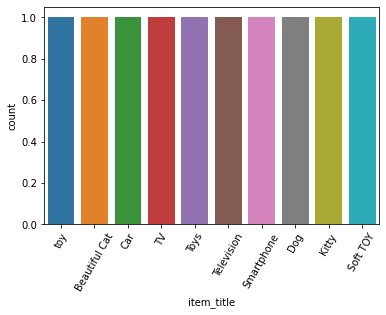

In [49]:
# какие наименования имеются?
g = sns.countplot(x=df.item_title)
_ = g.set_xticklabels(g.get_xticklabels(), rotation=60)

In [50]:
# сформировать, что заменяем и на что
animal_mapping = dict.fromkeys(['Beautiful Cat', 'Dog', 'Kitty'], 'Animal')
toy_mapping = dict.fromkeys(['toy', 'Toys', 'Soft TOY'], 'Toy')
electronic_mapping = dict.fromkeys(['TV', 'Television', 'Smartphone'], 'Electronic')

animal_mapping, toy_mapping, electronic_mapping

({'Beautiful Cat': 'Animal', 'Dog': 'Animal', 'Kitty': 'Animal'},
 {'toy': 'Toy', 'Toys': 'Toy', 'Soft TOY': 'Toy'},
 {'TV': 'Electronic', 'Television': 'Electronic', 'Smartphone': 'Electronic'})

In [51]:
all_mapping = {}
all_mapping.update(animal_mapping)
all_mapping.update(toy_mapping)
all_mapping.update(electronic_mapping)
all_mapping.update({'Car': 'Car'})    # иначе вместо него будет nan

all_mapping

{'Beautiful Cat': 'Animal',
 'Dog': 'Animal',
 'Kitty': 'Animal',
 'toy': 'Toy',
 'Toys': 'Toy',
 'Soft TOY': 'Toy',
 'TV': 'Electronic',
 'Television': 'Electronic',
 'Smartphone': 'Electronic',
 'Car': 'Car'}

In [52]:
# создать новую колонку с замененными значениями
df['item_title_bins'] = df.item_title.map(all_mapping)
df.item_title_bins

0           Toy
1        Animal
2           Car
3    Electronic
4           Toy
5    Electronic
6    Electronic
7        Animal
8        Animal
9           Toy
Name: item_title_bins, dtype: object

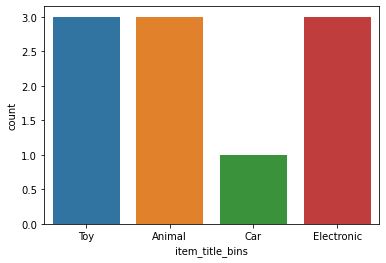

In [53]:
_ = sns.countplot(x=df.item_title_bins)

### Объединение в группы с помощью `replace` (`pandas`)

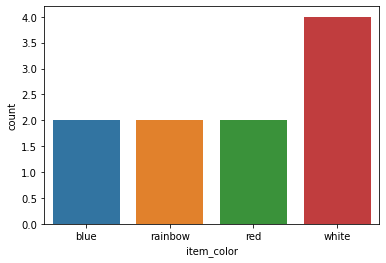

In [54]:
_ = sns.countplot(x=df.item_color)

In [55]:
item_color_replacement = {name: num for num, name in enumerate(df.item_color.value_counts().index)}
item_color_replacement

{'white': 0, 'blue': 1, 'rainbow': 2, 'red': 3}

In [56]:
# ВНИМАНИЕ: не удаляет значения, которые не указаны в replace
df['item_color_nums'] = df.item_color.replace(item_color_replacement)

In [57]:
df[['item_color', 'item_color_nums']]

,item_color,item_color_nums
0,red,3
1,blue,1
2,rainbow,2
3,white,0
4,red,3
5,white,0
6,rainbow,2
7,white,0
8,white,0
9,blue,1


### Объединение в группы с помощью `map` (`pandas`)

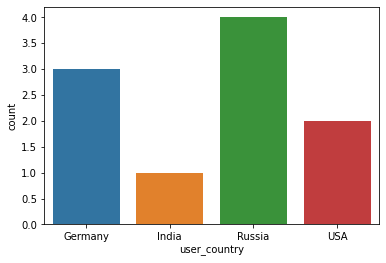

In [58]:
_ = sns.countplot(x=df.user_country)

In [59]:
user_country_mapping = {name: num for num, name in enumerate(df.user_country.value_counts().index)}
user_country_mapping

{'Russia': 0, 'Germany': 1, 'USA': 2, 'India': 3}

In [60]:
# ВНИМАНИЕ: удаляет значения, которые не указаны в map
df['user_country_nums'] = df.user_country.map(user_country_mapping)

In [61]:
df[['user_country', 'user_country_nums']]

,user_country,user_country_nums
0,Russia,0
1,Russia,0
2,USA,2
3,USA,2
4,India,3
5,Germany,1
6,Russia,0
7,Russia,0
8,Germany,1
9,Germany,1


### `LabelEncoder` (`sklearn`)

**ВНИМАНИЕ: `LabelEncoder` и `OrdinalEncoder` иметь одинаковую функциональность. Различие — это назначение. Класс `OrdinalEncoder` предназначен для преобразования признаков (features, обычно 2D-массив), а `LabelEncoder` - для преобразования целевой переменной (target variable, обычно 1D-массив).**

<img src="images/label_encoder_example.png" height=700 width=700/>

Этот подход **предполагает упорядочение категорий**:

`Никогда (0) < Редко (1) < Большинство дней (2) < Каждый день (3)`.

В результате получается один столбец целых чисел (от `0` до `n_categories - 1`) (тип `float`).

Входные данные должны быть массивом целых чисел или строк, обозначающих значения, принимаемые категориальными (дискретными) признаками.

Этот преобразователь следует использовать для кодирования целевых значений, т.е. `y`, а не входного `X`.

Для моделей на основе деревьев (таких, как деревья решений = `decision trees` и случайные леса = `random forests`) можно ожидать, что `LabelEncoder` будет хорошо работать с порядковыми переменными.

In [62]:
from sklearn.preprocessing import LabelEncoder

enc_l = LabelEncoder()
enc_l

LabelEncoder()

In [63]:
# подготовить кодировщик
# можно использовать несколько раз
# указать все возможные значения целевой переменной
# можно больше, чем имеется сейчас в наборе данных
enc_l.fit(['Russia', 'Germany', 'USA', 'India', 'Other'])

LabelEncoder()

In [64]:
# произвести преобразования с помощью заранее подготовленного кодировщика
df['user_country_enc_l'] = enc_l.transform(df.user_country)

In [65]:
# пронумерованы в алфавитном порядке
# другой порядок стандартными средствами не установить
df[['user_country', 'user_country_enc_l']]

,user_country,user_country_enc_l
0,Russia,3
1,Russia,3
2,USA,4
3,USA,4
4,India,1
5,Germany,0
6,Russia,3
7,Russia,3
8,Germany,0
9,Germany,0


### `OrdinalEncoder` (`sklearn`)

**ВНИМАНИЕ: `LabelEncoder` и `OrdinalEncoder` иметь одинаковую функциональность. Различие — это назначение. Класс `OrdinalEncoder` предназначен для преобразования признаков (features, обычно 2D-массив), а `LabelEncoder` - для преобразования целевой переменной (target variable, обычно 1D-массив).**

Кодирует категориальные признаки в целочисленный массив.

<img src="images/label_encoder_example.png" height=700 width=700/>

Этот подход **предполагает упорядочение категорий**:

`Никогда (0) < Редко (1) < Большинство дней (2) < Каждый день (3)`.

Это предположение имеет смысл в этом примере, потому что существует неоспоримое ранжирование категорий.

Входные данные должны быть массивом целых чисел или строк, обозначающих значения, принимаемые категориальными (дискретными) признаками. 

Признаки преобразуются в порядковые целые числа.

В результате получается один столбец целых чисел (от `0` до `n_categories - 1`) *для каждого признака* (тип `float`).

In [66]:
from sklearn.preprocessing import OrdinalEncoder

# можно определить порядок в каждой категории
# (хорошо подходит для ранговых шкал)
# если не определить порядок, то будет алфавитный
enc_ord = OrdinalEncoder(categories=[['red', 'white', 'blue', 'rainbow'], ['5 point', '4 point', '3 point', '2 point', '1 point']])
enc_ord

OrdinalEncoder(categories=[['red', 'white', 'blue', 'rainbow'],
                           ['5 point', '4 point', '3 point', '2 point',
                            '1 point']])

In [67]:
# подготовить кодировщик
# можно использовать несколько раз
enc_ord.fit(df[['item_color', 'user_complaints']])

OrdinalEncoder(categories=[['red', 'white', 'blue', 'rainbow'],
                           ['5 point', '4 point', '3 point', '2 point',
                            '1 point']])

In [68]:
# произвести преобразования с помощью заранее подготовленного кодировщика
df[['item_color_enc_ord', 'user_complaints_enc_ord']] = enc_ord.transform(df[['item_color', 'user_complaints']])

# пронумерованы в соответствии с указанным при создании порядком
df[['item_color', 'item_color_enc_ord', 'user_complaints', 'user_complaints_enc_ord']]

,item_color,item_color_enc_ord,user_complaints,user_complaints_enc_ord
0,red,0.0,1 point,4.0
1,blue,2.0,1 point,4.0
2,rainbow,3.0,4 point,1.0
3,white,1.0,4 point,1.0
4,red,0.0,5 point,0.0
5,white,1.0,5 point,0.0
6,rainbow,3.0,1 point,4.0
7,white,1.0,1 point,4.0
8,white,1.0,2 point,3.0
9,blue,2.0,2 point,3.0


In [69]:
df.item_color_enc_ord.dtype

dtype('float64')

### `OneHotEncoder` (`sklearn`)

**ВНИМАНИЕ: `LabelBinarizer` и `OneHotEncoder` иметь одинаковую функциональность. Различие — это назначение. Класс`OneHotEncoder` предназначен для преобразования признаков (features, обычно 2D-массив), а `LabelBinarizer` - для преобразования целевой переменной (target variable, обычно 1D-массив).**

Бинаризирует признаки по принципу "один против всех (one-vs-all)".

(aka `one-of-K` или `dummy`)

При использовании `OneHotEncoder` создаются новые столбцы, указывающие на наличие (или отсутствие) каждого возможного значения в исходных данных.

<img src="images/one_hot_encoder_example.png" height=700 width=700/>

В исходном наборе данных "Цвет" - это категориальная переменная с тремя категориями: "Красный", "Желтый" и "Зеленый".

Соответствующий `OneHotEncoder` содержит один столбец для каждого возможного значения и одну строку для каждой строки в исходном наборе данных.

Если исходным значением было "Красный", помещаем 1 в столбец "Красный". Если исходным значением было "Желтый", мы помещаем 1 в столбец "Желтый" и так далее.

`OneHotEncoder` **НЕ предполагает упорядочивания категорий**.

Таким образом, вы можете ожидать, что этот подход будет работать особенно хорошо, если в категориальных данных *нет четкого упорядочения* (например, "Красный" не больше и не меньше, чем "Желтый").

Невозможно явно контролировать, что происходит, когда встречается новый "синий": если предполагается, что это невозможно, то можно указать, чтобы он выдал ошибку с помощью `handle_unknown = "error"`; в противном случае мы можем сказать ему продолжить и просто установить красный и зеленый столбцы в 0 с помощью `handle_unknown = "ignore"`.

Категориальные переменные без внутреннего ранжирования называют **номинальными переменными**.

Объект `OneHotEncoder` обычно работает не очень хорошо, если категориальная переменная принимает большое количество значений (т.е. обычно **НЕ следует использовать его для признаков, принимающих более 15 различных значений**).

Класс `OneHotEncoder` необходим для подачи категориальных данных во многие алгоритмы `scikit-learn` особенно **линейные модели** и **SVM со стандартными ядрами**.

In [70]:
# известно, что в данном наборе данных не представлен вариант '3 point'
df.user_complaints.unique()

['1 point', '4 point', '5 point', '2 point']
Categories (4, object): ['5 point' < '4 point' < '2 point' < '1 point']

In [71]:
from sklearn.preprocessing import OneHotEncoder

# можно определить значения в каждой категории
# (хорошо подходит для номинальных шкал, 
# в которых не все значения представлены в наборе данных)
enc_oh = OneHotEncoder(sparse=False, categories=[['1 point', '2 point', '3 point', '4 point', '5 point'], 
                                                 df.user_rating.unique()])
enc_oh

OneHotEncoder(categories=[['1 point', '2 point', '3 point', '4 point',
                           '5 point'],
                          ['5 star', '3 star', '1 star', '2 star', '4 star']
Categories (5, object): ['1 star' < '2 star' < '3 star' < '4 star' < '5 star']],
              sparse=False)

In [72]:
# подготовить кодировщик
# можно использовать несколько раз
enc_oh.fit(df[['user_complaints', 'user_rating']])

OneHotEncoder(categories=[['1 point', '2 point', '3 point', '4 point',
                           '5 point'],
                          ['5 star', '3 star', '1 star', '2 star', '4 star']
Categories (5, object): ['1 star' < '2 star' < '3 star' < '4 star' < '5 star']],
              sparse=False)

In [73]:
# произвести преобразования с помощью заранее подготовленного кодировщика
enc_l_result = enc_oh.transform(df[['user_complaints', 'user_rating']])

# ВНИМАНИЕ: np.array - это не то, что можно сразу же добавить к DataFrame
enc_l_result

array([[1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [74]:
# получить имена новых колонок из кодировщика
column_names = enc_oh.get_feature_names(['user_complaints_enc_oh', 
                                         'user_rating_enc_oh'])
column_names

array(['user_complaints_enc_oh_1 point', 'user_complaints_enc_oh_2 point',
       'user_complaints_enc_oh_3 point', 'user_complaints_enc_oh_4 point',
       'user_complaints_enc_oh_5 point', 'user_rating_enc_oh_5 star',
       'user_rating_enc_oh_3 star', 'user_rating_enc_oh_1 star',
       'user_rating_enc_oh_2 star', 'user_rating_enc_oh_4 star'],
      dtype=object)

In [75]:
# соединить закодированные данные с названиями колонок и
# преобразовать в DataFrame
# ВНИМАНИЕ: существует колонка 3 points!
df_enc_l_result = pd.DataFrame(enc_l_result, columns=column_names)
df_enc_l_result

,user_complaints_enc_oh_1 point,user_complaints_enc_oh_2 point,user_complaints_enc_oh_3 point,user_complaints_enc_oh_4 point,user_complaints_enc_oh_5 point,user_rating_enc_oh_5 star,user_rating_enc_oh_3 star,user_rating_enc_oh_1 star,user_rating_enc_oh_2 star,user_rating_enc_oh_4 star
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [76]:
# присоединить закодированные колонки к основному набору данных
df = df.join(df_enc_l_result)
df

,user_name,user_country,user_age,user_rating,user_complaints,item_title,item_price_rub,item_width_cm,item_height_cm,item_description,item_tags,item_age_month,item_color,open_date_time,status,user_sex,item_title_grouped,tag_children,tag_beautiful,tag_good_condition,tag_animal,tag_cat,tag_dog,is_sold_out,kids_cv,perfect_cv,blocks_cv,adults_cv,love_cv,interior_cv,android_cv,is_white,is_blue,is_rainbow,is_red,is_item_color_white_or_blue,is_item_color_rainbow_or_red,item_title_bins,item_color_nums,user_country_nums,user_country_enc_l,item_color_enc_ord,user_complaints_enc_ord,user_complaints_enc_oh_1 point,user_complaints_enc_oh_2 point,user_complaints_enc_oh_3 point,user_complaints_enc_oh_4 point,user_complaints_enc_oh_5 point,user_rating_enc_oh_5 star,user_rating_enc_oh_3 star,user_rating_enc_oh_1 star,user_rating_enc_oh_2 star,user_rating_enc_oh_4 star
0,Mr Oleg,Russia,25,5 star,1 point,toy,300.50,20,30,Little kids love things bright and colorful. T...,"children, beautiful, good_condition",1,red,2020-10-10 18:25:00,sold out,False,Toy,True,True,True,False,False,False,True,1,0,1,0,1,0,0,False,False,False,True,False,True,Toy,3,0,3,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Mr Oleg,Russia,25,5 star,1 point,Beautiful Cat,5000.00,80,50,Kids and adults love cats! This animal is stun...,"animal, cat, beautiful",0,blue,2020-12-20 16:36:00,for_sale,False,Cat,False,True,False,True,True,False,False,1,0,0,1,1,0,0,False,True,False,False,True,False,Animal,1,0,3,2.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Mr Pete,USA,66,3 star,4 point,Car,800500.00,300,200,Comfortable seats. Updated interior displays. ...,"beautiful, good_condition",6,rainbow,2021-06-04 10:14:00,for_sale,False,Car,False,True,True,False,False,False,False,0,0,0,0,0,2,0,False,False,True,False,False,True,Car,2,2,4,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Mr Pete,USA,66,3 star,4 point,TV,19999.99,200,100,Operating System: Android (Google Assistant & ...,good_condition,12,white,2021-07-04 23:25:00,for_sale,False,TV,False,False,True,False,False,False,False,0,0,0,0,0,0,1,True,False,False,False,True,False,Electronic,0,2,4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Mrs Elena,India,36,1 star,5 point,Toys,678.23,100,80,Blocks for the creative minds. Perfect for the...,"children, animal",3,red,2020-11-25 06:17:00,sold out,True,Toy,True,False,False,True,False,False,True,1,1,3,0,0,0,0,False,False,False,True,False,True,Toy,3,3,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,Mr Viktor,Germany,15,2 star,5 point,Television,10999.99,150,80,Operating System: Android (Google Assistant & ...,good_condition,4,white,2020-12-16 15:15:00,sold out,False,TV,False,False,True,False,False,False,True,0,0,0,0,0,0,1,True,False,False,False,True,False,Electronic,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,Mr Anton,Russia,48,5 star,1 point,Smartphone,10000.00,10,15,"If you like Android, the Samsung Galaxy S21 Ul...",good_condition,18,rainbow,2021-10-03 09:08:00,for_sale,False,Smartphone,False,False,True,False,False,False,False,0,0,0,0,0,0,1,False,False,True,False,False,True,Electronic,2,0,3,3.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,Mr Anton,Russia,48,5 star,1 point,Dog,1000.00,100,90,This dog is a perfect choice! The dog for free...,"animal, dog",1,white,2020-12-31 04:57:00,for_sale,False,Dog,False,False,False,True,False,True,False,0,2,0,1,0,0,0,True,False,False,False,True,False,Animal,0,0,3,1.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,Mrs Alex,Germany,86,4 star,2 point,Kitty,100.00,15,10,Kittens for free adoption. Perfect for the adu...,animal,9,white,2020-12-28 12:54:00,sold out,True,Cat,False,False,False,True,False,False,True,0,1,0,1,0,0,0,True,False,False,False,True,False,Animal,0,1,0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,Mrs Alex,Germany,86,4 star,2 point,Soft TOY,4999.99,150,150,Kids and adults love soft toys! It can beautif...,"children, good_condition",8,blue,2020-12-29 23:25:00,for_sale,True,Toy,True,False,True,False,False,False,False,2,

### `LabelBinarizer` (`sklearn`)

**ВНИМАНИЕ: `LabelBinarizer` и `OneHotEncoder` иметь одинаковую функциональность. Различие — это назначение. Класс `OneHotEncoder` предназначен для преобразования признаков (features, обычно 2D-массив), а `LabelBinarizer` - для преобразования целевой переменной (target variable, обычно 1D-массив).**

Бинаризирует признаки по принципу "один против всех (one-vs-all)".

(aka `one-of-K` или `dummy`)

<img src="images/one_hot_encoder_example.png" height=700 width=700/>


При использовании `LabelBinarizer` создаются новые столбцы, указывающие на наличие (или отсутствие) каждого возможного значения в исходных данных.

`LabelBinarizer` **НЕ предполагает упорядочивания категорий**.

Категориальные переменные без внутреннего ранжирования называют **номинальными переменными**.

**НЕ следует использовать его для признаков, принимающих более 15 различных значений**

In [77]:
from sklearn.preprocessing import LabelBinarizer

enc_l_b = LabelBinarizer()
enc_l_b

LabelBinarizer()

In [78]:
# подготовить кодировщик
# можно использовать несколько раз
# указать все возможные значения целевой переменной
# дихотомическое значение (2 штуки)
enc_l_b.fit(df.status)

LabelBinarizer()

In [79]:
# произвести преобразования с помощью заранее подготовленного кодировщика
# ВНИМАНИЕ: при дихотомическом значение (2 штуки) 
# можно сразу же добавить к DataFrame
df['status_enc_l_b'] = enc_l_b.transform(df.status)

# значения заменены на 0 и 1
df[['status', 'status_enc_l_b']]

,status,status_enc_l_b
0,sold out,1
1,for_sale,0
2,for_sale,0
3,for_sale,0
4,sold out,1
5,sold out,1
6,for_sale,0
7,for_sale,0
8,sold out,1
9,for_sale,0


In [80]:
# подготовить кодировщик
# можно использовать несколько раз
# указать все возможные значения целевой переменной
# не дихотомическое значение (>2 штук)
enc_l_b.fit(df['user_rating'])

LabelBinarizer()

In [81]:
# произвести преобразования с помощью заранее подготовленного кодировщика
enc_l_b_result = enc_l_b.transform(df['user_rating'])

# ВНИМАНИЕ: np.array - это не то, что можно сразу же добавить к DataFrame
enc_l_b_result

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [82]:
# получить имена новых колонок из кодировщика
column_names = enc_l_b.classes_
column_names

array(['1 star', '2 star', '3 star', '4 star', '5 star'], dtype='<U6')

In [83]:
# соединить закодированные данные с названиями колонок и
# преобразовать в DataFrame
enc_l_b_result = pd.DataFrame(enc_l_b_result, columns=column_names)
enc_l_b_result

,1 star,2 star,3 star,4 star,5 star
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,1,0,0
4,1,0,0,0,0
5,0,1,0,0,0
6,0,0,0,0,1
7,0,0,0,0,1
8,0,0,0,1,0
9,0,0,0,1,0


In [84]:
# присоединить закодированные колонки к основному набору данных
df = df.join(enc_l_b_result)
df

,user_name,user_country,user_age,user_rating,user_complaints,item_title,item_price_rub,item_width_cm,item_height_cm,item_description,item_tags,item_age_month,item_color,open_date_time,status,user_sex,item_title_grouped,tag_children,tag_beautiful,tag_good_condition,tag_animal,tag_cat,tag_dog,is_sold_out,kids_cv,perfect_cv,blocks_cv,adults_cv,love_cv,interior_cv,android_cv,is_white,is_blue,is_rainbow,is_red,is_item_color_white_or_blue,is_item_color_rainbow_or_red,item_title_bins,item_color_nums,user_country_nums,user_country_enc_l,item_color_enc_ord,user_complaints_enc_ord,user_complaints_enc_oh_1 point,user_complaints_enc_oh_2 point,user_complaints_enc_oh_3 point,user_complaints_enc_oh_4 point,user_complaints_enc_oh_5 point,user_rating_enc_oh_5 star,user_rating_enc_oh_3 star,user_rating_enc_oh_1 star,user_rating_enc_oh_2 star,user_rating_enc_oh_4 star,status_enc_l_b,1 star,2 star,3 star,4 star,5 star
0,Mr Oleg,Russia,25,5 star,1 point,toy,300.50,20,30,Little kids love things bright and colorful. T...,"children, beautiful, good_condition",1,red,2020-10-10 18:25:00,sold out,False,Toy,True,True,True,False,False,False,True,1,0,1,0,1,0,0,False,False,False,True,False,True,Toy,3,0,3,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
1,Mr Oleg,Russia,25,5 star,1 point,Beautiful Cat,5000.00,80,50,Kids and adults love cats! This animal is stun...,"animal, cat, beautiful",0,blue,2020-12-20 16:36:00,for_sale,False,Cat,False,True,False,True,True,False,False,1,0,0,1,1,0,0,False,True,False,False,True,False,Animal,1,0,3,2.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1
2,Mr Pete,USA,66,3 star,4 point,Car,800500.00,300,200,Comfortable seats. Updated interior displays. ...,"beautiful, good_condition",6,rainbow,2021-06-04 10:14:00,for_sale,False,Car,False,True,True,False,False,False,False,0,0,0,0,0,2,0,False,False,True,False,False,True,Car,2,2,4,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0
3,Mr Pete,USA,66,3 star,4 point,TV,19999.99,200,100,Operating System: Android (Google Assistant & ...,good_condition,12,white,2021-07-04 23:25:00,for_sale,False,TV,False,False,True,False,False,False,False,0,0,0,0,0,0,1,True,False,False,False,True,False,Electronic,0,2,4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0
4,Mrs Elena,India,36,1 star,5 point,Toys,678.23,100,80,Blocks for the creative minds. Perfect for the...,"children, animal",3,red,2020-11-25 06:17:00,sold out,True,Toy,True,False,False,True,False,False,True,1,1,3,0,0,0,0,False,False,False,True,False,True,Toy,3,3,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,0,0,0,0
5,Mr Viktor,Germany,15,2 star,5 point,Television,10999.99,150,80,Operating System: Android (Google Assistant & ...,good_condition,4,white,2020-12-16 15:15:00,sold out,False,TV,False,False,True,False,False,False,True,0,0,0,0,0,0,1,True,False,False,False,True,False,Electronic,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0,0,0
6,Mr Anton,Russia,48,5 star,1 point,Smartphone,10000.00,10,15,"If you like Android, the Samsung Galaxy S21 Ul...",good_condition,18,rainbow,2021-10-03 09:08:00,for_sale,False,Smartphone,False,False,True,False,False,False,False,0,0,0,0,0,0,1,False,False,True,False,False,True,Electronic,2,0,3,3.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1
7,Mr Anton,Russia,48,5 star,1 point,Dog,1000.00,100,90,This dog is a perfect choice! The dog for free...,"animal, dog",1,white,2020-12-31 04:57:00,for_sale,False,Dog,False,False,False,True,False,True,False,0,2,0,1,0,0,0,True,False,False,False,True,False,Animal,0,0,3,1.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1
8,Mrs Alex,Germany,86,4 star,2 point,Kitty,100.00,15,10,Kittens for free adoption. Perfect for the adu...,animal,9,white,2020-12-28 12:54:00,sold out,True,Cat,False,False,False,True,False,False,True,0,1,0,1,0,0,0,True,False,False,False,True,False,Animal,0,1,0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,1,0
9,Mrs Alex,Germany,86,4 star,2 point,Soft TOY,4999.99,150,150,Kids a

### Dummies (`pandas`)

**По функциональности очень похож на `OneHotEncoder`**.

**`pd.get_dummies` приводит к матрице `Pandas DataFrame`, тогда как `OneHotEncoder` приводит к матрице `SciPy CSR`**.

**`pd.get_dummies` намного быстрее, чем `OneHotEncoder`**.

Суть в том, что кодировщик `OneHotEncoder` создает функцию, которая сохраняется и затем может применяться к новым наборам данных, которые используют те же категориальные переменные, с согласованными результатами.

Кодировщик `OneHotEncoder`, после того как создан, можно повторно использовать для получения одного и того же вывода каждый раз.

In [85]:
dummies = pd.get_dummies(df[['user_complaints', 'user_rating']])
dummies

,user_complaints_5 point,user_complaints_4 point,user_complaints_3 point,user_complaints_2 point,user_complaints_1 point,user_rating_1 star,user_rating_2 star,user_rating_3 star,user_rating_4 star,user_rating_5 star
0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0
6,0,0,0,0,1,0,0,0,0,1
7,0,0,0,0,1,0,0,0,0,1
8,0,0,0,1,0,0,0,0,1,0
9,0,0,0,1,0,0,0,0,1,0


In [86]:
df = df.join(dummies)
df

,user_name,user_country,user_age,user_rating,user_complaints,item_title,item_price_rub,item_width_cm,item_height_cm,item_description,item_tags,item_age_month,item_color,open_date_time,status,user_sex,item_title_grouped,tag_children,tag_beautiful,tag_good_condition,tag_animal,tag_cat,tag_dog,is_sold_out,kids_cv,perfect_cv,blocks_cv,adults_cv,love_cv,interior_cv,android_cv,is_white,is_blue,is_rainbow,is_red,is_item_color_white_or_blue,is_item_color_rainbow_or_red,item_title_bins,item_color_nums,user_country_nums,user_country_enc_l,item_color_enc_ord,user_complaints_enc_ord,user_complaints_enc_oh_1 point,user_complaints_enc_oh_2 point,user_complaints_enc_oh_3 point,user_complaints_enc_oh_4 point,user_complaints_enc_oh_5 point,user_rating_enc_oh_5 star,user_rating_enc_oh_3 star,user_rating_enc_oh_1 star,user_rating_enc_oh_2 star,user_rating_enc_oh_4 star,status_enc_l_b,1 star,2 star,3 star,4 star,5 star,user_complaints_5 point,user_complaints_4 point,user_complaints_3 point,user_complaints_2 point,user_complaints_1 point,user_rating_1 star,user_rating_2 star,user_rating_3 star,user_rating_4 star,user_rating_5 star
0,Mr Oleg,Russia,25,5 star,1 point,toy,300.50,20,30,Little kids love things bright and colorful. T...,"children, beautiful, good_condition",1,red,2020-10-10 18:25:00,sold out,False,Toy,True,True,True,False,False,False,True,1,0,1,0,1,0,0,False,False,False,True,False,True,Toy,3,0,3,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,Mr Oleg,Russia,25,5 star,1 point,Beautiful Cat,5000.00,80,50,Kids and adults love cats! This animal is stun...,"animal, cat, beautiful",0,blue,2020-12-20 16:36:00,for_sale,False,Cat,False,True,False,True,True,False,False,1,0,0,1,1,0,0,False,True,False,False,True,False,Animal,1,0,3,2.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,Mr Pete,USA,66,3 star,4 point,Car,800500.00,300,200,Comfortable seats. Updated interior displays. ...,"beautiful, good_condition",6,rainbow,2021-06-04 10:14:00,for_sale,False,Car,False,True,True,False,False,False,False,0,0,0,0,0,2,0,False,False,True,False,False,True,Car,2,2,4,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
3,Mr Pete,USA,66,3 star,4 point,TV,19999.99,200,100,Operating System: Android (Google Assistant & ...,good_condition,12,white,2021-07-04 23:25:00,for_sale,False,TV,False,False,True,False,False,False,False,0,0,0,0,0,0,1,True,False,False,False,True,False,Electronic,0,2,4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,Mrs Elena,India,36,1 star,5 point,Toys,678.23,100,80,Blocks for the creative minds. Perfect for the...,"children, animal",3,red,2020-11-25 06:17:00,sold out,True,Toy,True,False,False,True,False,False,True,1,1,3,0,0,0,0,False,False,False,True,False,True,Toy,3,3,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
5,Mr Viktor,Germany,15,2 star,5 point,Television,10999.99,150,80,Operating System: Android (Google Assistant & ...,good_condition,4,white,2020-12-16 15:15:00,sold out,False,TV,False,False,True,False,False,False,True,0,0,0,0,0,0,1,True,False,False,False,True,False,Electronic,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
6,Mr Anton,Russia,48,5 star,1 point,Smartphone,10000.00,10,15,"If you like Android, the Samsung Galaxy S21 Ul...",good_condition,18,rainbow,2021-10-03 09:08:00,for_sale,False,Smartphone,False,False,True,False,False,False,False,0,0,0,0,0,0,1,False,False,True,False,False,True,Electronic,2,0,3,3.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
7,Mr Anton,Russia,48,5 star,1 point,Dog,1000.00,100,90,This dog is a perfect choice! The dog for free...,"animal, dog",1,white,2020-12-31 04:57:00,for_sale,False,Dog,False,False,False,True,False,True,False,0,2,0,1,0,0,0,True,False,False,False,True,False,Animal,0,0,3,1.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
8,Mrs Alex,Ge

### `CountEncoder` (`category_encoders`)

Заменяет каждое категориальное значение количеством раз, сколько оно появляется в наборе данных.

Необходимо установить пакет [Category Encoders](http://contrib.scikit-learn.org/category_encoders/)

In [87]:
import category_encoders as ce

count_enc = ce.CountEncoder()
count_enc

CountEncoder(combine_min_nan_groups=True)

In [88]:
# подготовить кодировщик
# и сразу же
# произвести преобразования 
count_encoded = count_enc.fit_transform(df[['user_country', 'item_color']])
count_encoded

,user_country,item_color
0,4,2
1,4,2
2,2,2
3,2,4
4,1,2
5,3,4
6,4,2
7,4,4
8,3,4
9,3,2


In [89]:
# присоединить закодированные колонки
# к основному набору данных с суффиксом
df = df.join(count_encoded.add_suffix("_count"))
df

,user_name,user_country,user_age,user_rating,user_complaints,item_title,item_price_rub,item_width_cm,item_height_cm,item_description,item_tags,item_age_month,item_color,open_date_time,status,user_sex,item_title_grouped,tag_children,tag_beautiful,tag_good_condition,tag_animal,tag_cat,tag_dog,is_sold_out,kids_cv,perfect_cv,blocks_cv,adults_cv,love_cv,interior_cv,android_cv,is_white,is_blue,is_rainbow,is_red,is_item_color_white_or_blue,is_item_color_rainbow_or_red,item_title_bins,item_color_nums,user_country_nums,user_country_enc_l,item_color_enc_ord,user_complaints_enc_ord,user_complaints_enc_oh_1 point,user_complaints_enc_oh_2 point,user_complaints_enc_oh_3 point,user_complaints_enc_oh_4 point,user_complaints_enc_oh_5 point,user_rating_enc_oh_5 star,user_rating_enc_oh_3 star,user_rating_enc_oh_1 star,user_rating_enc_oh_2 star,user_rating_enc_oh_4 star,status_enc_l_b,1 star,2 star,3 star,4 star,5 star,user_complaints_5 point,user_complaints_4 point,user_complaints_3 point,user_complaints_2 point,user_complaints_1 point,user_rating_1 star,user_rating_2 star,user_rating_3 star,user_rating_4 star,user_rating_5 star,user_country_count,item_color_count
0,Mr Oleg,Russia,25,5 star,1 point,toy,300.50,20,30,Little kids love things bright and colorful. T...,"children, beautiful, good_condition",1,red,2020-10-10 18:25:00,sold out,False,Toy,True,True,True,False,False,False,True,1,0,1,0,1,0,0,False,False,False,True,False,True,Toy,3,0,3,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,4,2
1,Mr Oleg,Russia,25,5 star,1 point,Beautiful Cat,5000.00,80,50,Kids and adults love cats! This animal is stun...,"animal, cat, beautiful",0,blue,2020-12-20 16:36:00,for_sale,False,Cat,False,True,False,True,True,False,False,1,0,0,1,1,0,0,False,True,False,False,True,False,Animal,1,0,3,2.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,4,2
2,Mr Pete,USA,66,3 star,4 point,Car,800500.00,300,200,Comfortable seats. Updated interior displays. ...,"beautiful, good_condition",6,rainbow,2021-06-04 10:14:00,for_sale,False,Car,False,True,True,False,False,False,False,0,0,0,0,0,2,0,False,False,True,False,False,True,Car,2,2,4,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,2,2
3,Mr Pete,USA,66,3 star,4 point,TV,19999.99,200,100,Operating System: Android (Google Assistant & ...,good_condition,12,white,2021-07-04 23:25:00,for_sale,False,TV,False,False,True,False,False,False,False,0,0,0,0,0,0,1,True,False,False,False,True,False,Electronic,0,2,4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,2,4
4,Mrs Elena,India,36,1 star,5 point,Toys,678.23,100,80,Blocks for the creative minds. Perfect for the...,"children, animal",3,red,2020-11-25 06:17:00,sold out,True,Toy,True,False,False,True,False,False,True,1,1,3,0,0,0,0,False,False,False,True,False,True,Toy,3,3,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2
5,Mr Viktor,Germany,15,2 star,5 point,Television,10999.99,150,80,Operating System: Android (Google Assistant & ...,good_condition,4,white,2020-12-16 15:15:00,sold out,False,TV,False,False,True,False,False,False,True,0,0,0,0,0,0,1,True,False,False,False,True,False,Electronic,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,3,4
6,Mr Anton,Russia,48,5 star,1 point,Smartphone,10000.00,10,15,"If you like Android, the Samsung Galaxy S21 Ul...",good_condition,18,rainbow,2021-10-03 09:08:00,for_sale,False,Smartphone,False,False,True,False,False,False,False,0,0,0,0,0,0,1,False,False,True,False,False,True,Electronic,2,0,3,3.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,4,2
7,Mr Anton,Russia,48,5 star,1 point,Dog,1000.00,100,90,This dog is a perfect choice! The dog for free...,"animal, dog",1,white,2020-12-31 04:57:00,for_sale,False,Dog,False,False,False,True,False,True,False,0,2,0,1,0,0,0,True,False,False,False,True,False,Animal,0,0,3,1.0,4.0,1.0,0.0,0.0,0.0,0.0,1

### `TargetEncoder` (`category_encoders`)

Заменяет категориальное значение средним значением для этого признака.

Например, учитывая дано значение для страны "RU", вычислить средний доход для всех строк с country == "RU", допустим 0.28.

Необходимо установить пакет [Category Encoders](http://contrib.scikit-learn.org/category_encoders/)

In [90]:
import category_encoders as ce

target_enc = ce.TargetEncoder(cols=df[['user_rating']])
target_enc

TargetEncoder(cols=  user_rating
0      5 star
1      5 star
2      3 star
3      3 star
4      1 star
5      2 star
6      5 star
7      5 star
8      4 star
9      4 star)

In [91]:
# ВНИМАНИЕ: FutureWarning - это нормально (проблема библиотеки)
# подготовить кодировщик
target_enc.fit(df[['user_rating']], df.user_age)

/home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


TargetEncoder(cols=  user_rating
0      5 star
1      5 star
2      3 star
3      3 star
4      1 star
5      2 star
6      5 star
7      5 star
8      4 star
9      4 star)

In [92]:
# произвести преобразования 
target_encoded = target_enc.transform(df[['user_rating']], df.user_age)
target_encoded

,user_rating
0,37.144992
1,37.144992
2,61.723831
3,61.723831
4,50.100000
5,50.100000
6,37.144992
7,37.144992
8,76.345003
9,76.345003


In [93]:
# присоединить закодированные колонки
# к основному набору данных с суффиксом
df = df.join(target_encoded.add_suffix("_target"))
df

,user_name,user_country,user_age,user_rating,user_complaints,item_title,item_price_rub,item_width_cm,item_height_cm,item_description,item_tags,item_age_month,item_color,open_date_time,status,user_sex,item_title_grouped,tag_children,tag_beautiful,tag_good_condition,tag_animal,tag_cat,tag_dog,is_sold_out,kids_cv,perfect_cv,blocks_cv,adults_cv,love_cv,interior_cv,android_cv,is_white,is_blue,is_rainbow,is_red,is_item_color_white_or_blue,is_item_color_rainbow_or_red,item_title_bins,item_color_nums,user_country_nums,user_country_enc_l,item_color_enc_ord,user_complaints_enc_ord,user_complaints_enc_oh_1 point,user_complaints_enc_oh_2 point,user_complaints_enc_oh_3 point,user_complaints_enc_oh_4 point,user_complaints_enc_oh_5 point,user_rating_enc_oh_5 star,user_rating_enc_oh_3 star,user_rating_enc_oh_1 star,user_rating_enc_oh_2 star,user_rating_enc_oh_4 star,status_enc_l_b,1 star,2 star,3 star,4 star,5 star,user_complaints_5 point,user_complaints_4 point,user_complaints_3 point,user_complaints_2 point,user_complaints_1 point,user_rating_1 star,user_rating_2 star,user_rating_3 star,user_rating_4 star,user_rating_5 star,user_country_count,item_color_count,user_rating_target
0,Mr Oleg,Russia,25,5 star,1 point,toy,300.50,20,30,Little kids love things bright and colorful. T...,"children, beautiful, good_condition",1,red,2020-10-10 18:25:00,sold out,False,Toy,True,True,True,False,False,False,True,1,0,1,0,1,0,0,False,False,False,True,False,True,Toy,3,0,3,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,4,2,37.144992
1,Mr Oleg,Russia,25,5 star,1 point,Beautiful Cat,5000.00,80,50,Kids and adults love cats! This animal is stun...,"animal, cat, beautiful",0,blue,2020-12-20 16:36:00,for_sale,False,Cat,False,True,False,True,True,False,False,1,0,0,1,1,0,0,False,True,False,False,True,False,Animal,1,0,3,2.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,4,2,37.144992
2,Mr Pete,USA,66,3 star,4 point,Car,800500.00,300,200,Comfortable seats. Updated interior displays. ...,"beautiful, good_condition",6,rainbow,2021-06-04 10:14:00,for_sale,False,Car,False,True,True,False,False,False,False,0,0,0,0,0,2,0,False,False,True,False,False,True,Car,2,2,4,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,2,2,61.723831
3,Mr Pete,USA,66,3 star,4 point,TV,19999.99,200,100,Operating System: Android (Google Assistant & ...,good_condition,12,white,2021-07-04 23:25:00,for_sale,False,TV,False,False,True,False,False,False,False,0,0,0,0,0,0,1,True,False,False,False,True,False,Electronic,0,2,4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,2,4,61.723831
4,Mrs Elena,India,36,1 star,5 point,Toys,678.23,100,80,Blocks for the creative minds. Perfect for the...,"children, animal",3,red,2020-11-25 06:17:00,sold out,True,Toy,True,False,False,True,False,False,True,1,1,3,0,0,0,0,False,False,False,True,False,True,Toy,3,3,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2,50.100000
5,Mr Viktor,Germany,15,2 star,5 point,Television,10999.99,150,80,Operating System: Android (Google Assistant & ...,good_condition,4,white,2020-12-16 15:15:00,sold out,False,TV,False,False,True,False,False,False,True,0,0,0,0,0,0,1,True,False,False,False,True,False,Electronic,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,3,4,50.100000
6,Mr Anton,Russia,48,5 star,1 point,Smartphone,10000.00,10,15,"If you like Android, the Samsung Galaxy S21 Ul...",good_condition,18,rainbow,2021-10-03 09:08:00,for_sale,False,Smartphone,False,False,True,False,False,False,False,0,0,0,0,0,0,1,False,False,True,False,False,True,Electronic,2,0,3,3.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,4,2,37.144992
7,Mr Anton,Russia,48,5 star,1 point,Dog,1000.00,100,90,This dog is a perfect choice! The dog for free...,"animal, dog",1,white,2020-12-31 04:57:00,for_sale,False,Dog,False,False,False,True,False,True,False,0

### *`CatBoostEncoder` (`category_encoders`)

Похож на `TargetEncoder` в том смысле, что оно основано на целевой вероятности (target probability) для данного значения. Однако с `CatBoostEncoder` для каждой строки целевая вероятность вычисляется только из строк перед ней.

Необходимо установить пакет [Category Encoders](http://contrib.scikit-learn.org/category_encoders/)

In [94]:
import category_encoders as ce

cat_boost_enc = ce.CatBoostEncoder(cols=['user_country', 'user_rating'])
cat_boost_enc

CatBoostEncoder(cols=['user_country', 'user_rating'])

In [95]:
# ВНИМАНИЕ: FutureWarning - это нормально (проблема библиотеки)
# подготовить кодировщик
cat_boost_enc.fit(df[['user_country', 'user_rating']], df.user_age)

/home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


CatBoostEncoder(cols=['user_country', 'user_rating'])

In [96]:
# произвести преобразования 
# сохранить в исходный набор данных
df[['user_country_cat_boost', 'user_rating_cat_boost']] = cat_boost_enc.transform(df[['user_country', 'user_rating']], df.user_age)
df[['user_country_cat_boost', 'user_rating_cat_boost']]

,user_country_cat_boost,user_rating_cat_boost
0,50.100000,50.100000
1,37.550000,37.550000
2,50.100000,50.100000
3,58.050000,58.050000
4,50.100000,50.100000
5,50.100000,50.100000
6,33.366667,33.366667
7,37.025000,37.025000
8,32.550000,50.100000
9,50.366667,68.050000


## Числовые признаки

**Возможное решение:**
- Округление вещественных чисел (и другие математические операции).
- Объединение нескольких числовых признаков в один с помощью математических преобразований. Пример: признаки "длина" и "ширина" преобразовать к признаку "площадь". 
- Приведение числового признака к категориальному и формирование "интервалов" (Binning/Discretization). Пример: добавить признаки вида "рост больше X", "рост меньше X" или "доход больше 100тыс" или "высокий доход". Далее применить преобразования для категориальных признаков.

In [97]:
df.select_dtypes(include=np.number)

,user_age,item_price_rub,item_width_cm,item_height_cm,item_age_month,kids_cv,perfect_cv,blocks_cv,adults_cv,love_cv,interior_cv,android_cv,item_color_nums,user_country_enc_l,item_color_enc_ord,user_complaints_enc_ord,user_complaints_enc_oh_1 point,user_complaints_enc_oh_2 point,user_complaints_enc_oh_3 point,user_complaints_enc_oh_4 point,user_complaints_enc_oh_5 point,user_rating_enc_oh_5 star,user_rating_enc_oh_3 star,user_rating_enc_oh_1 star,user_rating_enc_oh_2 star,user_rating_enc_oh_4 star,status_enc_l_b,1 star,2 star,3 star,4 star,5 star,user_complaints_5 point,user_complaints_4 point,user_complaints_3 point,user_complaints_2 point,user_complaints_1 point,user_rating_1 star,user_rating_2 star,user_rating_3 star,user_rating_4 star,user_rating_5 star,item_color_count,user_rating_target,user_country_cat_boost,user_rating_cat_boost
0,25,300.50,20,30,1,1,0,1,0,1,0,0,3,3,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2,37.144992,50.100000,50.100000
1,25,5000.00,80,50,0,1,0,0,1,1,0,0,1,3,2.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2,37.144992,37.550000,37.550000
2,66,800500.00,300,200,6,0,0,0,0,0,2,0,2,4,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,2,61.723831,50.100000,50.100000
3,66,19999.99,200,100,12,0,0,0,0,0,0,1,0,4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,4,61.723831,58.050000,58.050000
4,36,678.23,100,80,3,1,1,3,0,0,0,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2,50.100000,50.100000,50.100000
5,15,10999.99,150,80,4,0,0,0,0,0,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,4,50.100000,50.100000,50.100000
6,48,10000.00,10,15,18,0,0,0,0,0,0,1,2,3,3.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2,37.144992,33.366667,33.366667
7,48,1000.00,100,90,1,0,2,0,1,0,0,0,0,3,1.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,4,37.144992,37.025000,37.025000
8,86,100.00,15,10,9,0,1,0,1,0,0,0,0,0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,4,76.345003,32.550000,50.100000
9,86,4999.99,150,150,8,2,1,0,1,1,1,0,1,0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,2,76.345003,50.366667,68.050000


### Округление вещественных чисел

### Объединение нескольких числовых признаков в один

### Приведение числового признака к категориальному и формирование "интервалов" (Binning/Discretization)

Биннинг - это **метод сглаживания данных (data smoothing)**.

Сглаживание данных используется для удаления шума из данных. 

Распространненые методы сглаживания данных:
- binning
- regression
- outlier analysis

#### Биннинг по расстоянию (Binning by distance) с помощью `cut` (`pandas`)

В этом случае нужно определить края каждого бина. Для этого можно использовать функцию [cut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html).

In [98]:
# получить минимальное и максимальное значение
user_age_min, user_age_max = df.user_age.min(), df.user_age.max()
user_age_min, user_age_max

(15, 86)

In [99]:
# можно вычислить диапазон каждого интервала, 
# то есть минимальное и максимальное значение каждого интервала

# допустим необходимо 3 группы, тогда будет 4 "края" интервалов (бинов)

# можно использовать функцию linspace() пакета numpy 
# для вычисления 4 равномерно распределенных бинов

user_age_bins_linspace = np.linspace(user_age_min, user_age_max, 4)
user_age_bins_linspace

array([15.        , 38.66666667, 62.33333333, 86.        ])

In [100]:
# определить ярлыки
user_age_labels_linspace = ['young', 'mature', 'senior']
user_age_labels_linspace

['young', 'mature', 'senior']

In [101]:
# использовать функцию cut() для преобразования 
# числовых значений столбца в категориальные значения

# нужно указать интервалы и метки
# также установим для параметра include_lowest значение True, 
# чтобы включить также минимальное значение
df['user_age_bins_linspace'] = pd.cut(df.user_age, 
                                      bins=user_age_bins_linspace, 
                                      labels=user_age_labels_linspace,
                                      include_lowest=True)

df[['user_age', 'user_age_bins_linspace']]

,user_age,user_age_bins_linspace
0,25,young
1,25,young
2,66,senior
3,66,senior
4,36,young
5,15,young
6,48,mature
7,48,mature
8,86,senior
9,86,senior


<AxesSubplot:xlabel='user_age_bins_linspace', ylabel='count'>

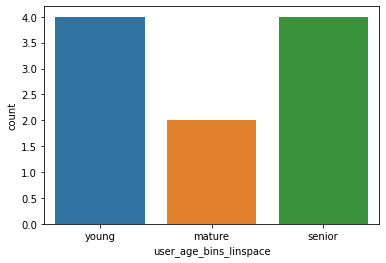

In [102]:
# сколько записей оказалось в каждой категории
sns.countplot(x=df.user_age_bins_linspace)

In [103]:
# также можно установить интервалы вручную
user_age_bins_manual = [0, 18, 
                        25, 50, 
                        75, 150]

# определить ярлыки
user_age_labels_manual = ['children', 'young adult', 
                          'adult', 'mature', 
                          'senior']


# нужно указать интервалы и метки
# также установим для параметра include_lowest значение True, 
# чтобы включить также минимальное значение
df['user_age_bins_manual'] = pd.cut(df.user_age, 
                                    bins=user_age_bins_manual, 
                                    labels=user_age_labels_manual, 
                                    include_lowest=True)

df[['user_age', 'user_age_bins_manual']]

,user_age,user_age_bins_manual
0,25,young adult
1,25,young adult
2,66,mature
3,66,mature
4,36,adult
5,15,children
6,48,adult
7,48,adult
8,86,senior
9,86,senior


<AxesSubplot:xlabel='user_age_bins_manual', ylabel='count'>

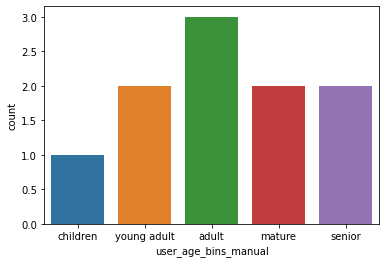

In [104]:
# сколько записей оказалось в каждой категории
sns.countplot(x=df.user_age_bins_manual)

#### Биннинг по частоте (Binning by frequency) с помощью `qcut` (`pandas`)

Биннинг по частоте вычисляет размер каждой ячейки, таким образом чтобы каждая ячейка содержит (почти) одинаковое количество наблюдений, но диапазон ячеек будет варьироваться.

Для этого проще всего использовать функцию [qcut()](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html).

Можем установить параметр `precision`, чтобы определить количество десятичных знаков.

In [105]:
# определить ярлыки
item_price_rub_labels_qcut = ['low', 'medium', 'high']

# нужно указать количество интервалов и метки
df['item_price_rub_bins_qcut'] = pd.qcut(df.item_price_rub, 
                                         q=3, 
                                         labels=item_price_rub_labels_qcut)

df[['item_price_rub', 'item_price_rub_bins_qcut']]

,item_price_rub,item_price_rub_bins_qcut
0,300.50,low
1,5000.00,medium
2,800500.00,high
3,19999.99,high
4,678.23,low
5,10999.99,high
6,10000.00,medium
7,1000.00,low
8,100.00,low
9,4999.99,medium


<AxesSubplot:xlabel='item_price_rub_bins_qcut', ylabel='count'>

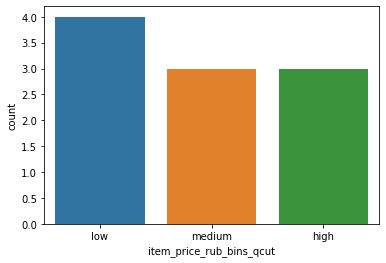

In [106]:
# сколько записей оказалось в каждой категории
sns.countplot(x=df.item_price_rub_bins_qcut)

#### Семплирование (Sampling)

В математической статистике **семплирование (от англ. sample — выборка)** — обобщенное название методов управления начальной выборкой при известной цели моделирования, которые позволяют выполнить структурно-параметрическую идентификацию наилучшей статистической модели.

Научная новизна метода семплинга состоит в том, что он является эффективным приемом для логичного смыслового увязывания статистических свойств выборки и цели моделирования.

**Позволяет уменьшить количество примеров, группируя похожие значения или смежные (contiguous) значения**.

Подходы:
- по среднему бину (by bin means): каждое значение в бине заменяется средним значением бина.
- по медиане бина (by bin median): каждое значение в бине заменяется медианой бина.
- по границе бина (by bin boundary): каждое значение интервала заменяется ближайшим граничным значением, то есть максимальным или минимальным значением бина.

Для этого потребуется функция [scipy.stats.binned_statistic](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binned_statistic.html).

Функция `scipy.stats.binned_statistic` получает в качестве входных данных два массива, `x_data` и `y_data`, а также используемую статистику (например, медиана или среднее значение) и количество создаваемых бинов. Функция возвращает значения бинов, а также края каждого бина.

In [107]:
from scipy.stats import binned_statistic

x_data = np.arange(0, len(df))
y_data = df.user_age


statistic, bin_edges, bin_number = binned_statistic(y_data, 
                                                    x_data, 
                                                    statistic="median",
                                                    bins=3)
statistic, bin_edges, bin_number

(array([2.5, 6.5, 5.5]),
 array([15.        , 38.66666667, 62.33333333, 86.        ]),
 array([1, 1, 3, 3, 1, 1, 2, 2, 3, 3]))

Затем необходимо приблизить каждое значение столбца к среднему значению соответствующего бина. 

Таким образом, края бина преобразуются в `IntervalIndex`, который получает в качестве индекса левые и правые края каждого бина.

In [108]:
intervals_tuples = [tuple(bin_edges[0:2]), 
                    tuple(bin_edges[1:3]), 
                    tuple(bin_edges[2:4])]

intervals_tuples

[(15.0, 38.66666666666667),
 (38.66666666666667, 62.333333333333336),
 (62.333333333333336, 86.0)]

In [109]:
bin_intervals = pd.IntervalIndex.from_tuples(intervals_tuples, 
                                             closed='both')
bin_intervals

IntervalIndex([[15.0, 38.66666666666667], [38.66666666666667, 62.333333333333336], [62.333333333333336, 86.0]],
              closed='both',
              dtype='interval[float64]')

Можно дискретизировать (quantize) столбец, определив функцию set_to_median(), которая перебирает бины и, когда находит правильный бин, возвращает среднее (mid) значение.

In [110]:
def set_to_median(x, bin_intervals):
    for interval in bin_intervals:
        if x in interval:
            return interval.mid

In [111]:
# используем функцию apply(), чтобы применить 
# set_to_median() к столбцу
df['user_age_sampled'] = df['user_age'].apply(lambda x: set_to_median(x, bin_intervals))

df[['user_age','user_age_sampled']]

,user_age,user_age_sampled
0,25,26.833333
1,25,26.833333
2,66,74.166667
3,66,74.166667
4,36,26.833333
5,15,26.833333
6,48,50.500000
7,48,50.500000
8,86,74.166667
9,86,74.166667


<AxesSubplot:>

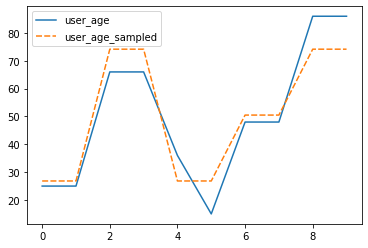

In [112]:
# можем построить график
# отметим потерю информации

sns.lineplot(data=df[['user_age', 'user_age_sampled']])

#### Calculate the natural breaks in data

### `KBinsDiscretizer` (`sklearn`)

## Дата и время

**Возможное решение:**
- Добавить признаки, соответствующие 
    - времени дня
    - количеству прошедшего времени с определенного момента
    - выделение сезонов, времен года, кварталов, праздничных дней
    - состояние погоды для этих дней (может быть в дождливые дни поведение покупателей меняется?)
- Разделение времени на часы, минуты и секунды (если время дано в Unix-Time или ISO формате). 

## Результаты других алгоритмов

Если решается задача классификации, можно сначала решить вспомогательную задачу кластеризации, и в качестве признака в первоначальной задаче взять кластер объекта.

Это обычно происходит на основе первичного анализа данных в случае, когда объекты хорошо кластеризуются.

## Агрегированные признаки

Признаки, которые агрегируют признаки некоторого объекта, тем самым также сокращая размерность признакового описания.

Полезно в задачах, в которых один объект содержит несколько однотипных параметров.

Например, человек, имеющий несколько автомобилей разной стоимости. В данном случае можно рассмотреть признаки, соответствующие максимальной/минимальной/средней стоимости автомобиля этого человека.

## *Добавление новых признаков

Чтобы эффективно решить задачу, необходимо быть экспертом в конкретной области и понимать, что влияет на конкретную целевую переменную. 

## Рекомендации

- Избегайте редко используемых дискретных значений признаков.
    - Хорошие значения характеристик должны появляться в наборе данных более 5 раз.
    - И наоборот, если значение появляется только один раз или очень редко, модель не может делать прогнозы на основе этого значения признака.
- Стремитесь к ясным и очевидным значениям.
    - Каждый признак должен иметь ясное и очевидное значение для всех участников проекта. 
- Учитывайте нестабильность входящего потока.
    - Определение признака не должно менять со временем.
    - Но при получении значения с помощью другой модели сопряжено с дополнительными трудностями.
- Чаще всего необходимо избавиться от дублирующих строк.